In [70]:
import uproot3 as uproot
import matplotlib.pyplot as plt
import numpy as np


In [71]:

# Open the ROOT file and get the TTree
file = uproot.open("tracksummary_fitter.root")
tree = file["tracksummary"]



In [72]:
event_nr = tree.array("event_nr")
multiTraj_nr = tree.array("multiTraj_nr")
subTraj_nr = tree.array("subTraj_nr")
nStates = tree.array("nStates")
nMeasurements = tree.array("nMeasurements")
nOutliers = tree.array("nOutliers")
nHoles = tree.array("nHoles")
chi2Sum = tree.array("chi2Sum")
NDF = tree.array("NDF")
measurementChi2 = tree.array("measurementChi2")
outlierChi2 = tree.array("outlierChi2")
measurementVolume = tree.array("measurementVolume")
measurementLayer = tree.array("measurementLayer")
outlierVolume = tree.array("outlierVolume")
outlierLayer = tree.array("outlierLayer")
majorityParticleId = tree.array("majorityParticleId")
nMajorityHits = tree.array("nMajorityHits")
t_charge = tree.array("t_charge")
t_time = tree.array("t_time")
t_vx = tree.array("t_vx")
t_vy = tree.array("t_vy")
t_vz = tree.array("t_vz")
t_px = tree.array("t_px")
t_py = tree.array("t_py")
t_pz = tree.array("t_pz")
t_p = tree.array("t_p")
t_d0 = tree.array("t_d0")
t_z0 = tree.array("t_z0")

t_theta = tree.array("t_theta")
t_phi = tree.array("t_phi")
t_eta = tree.array("t_eta")
t_pT = tree.array("t_pT")
hasFittedParams = tree.array("hasFittedParams")
eLOC0_fit = tree.array("eLOC0_fit")
eLOC1_fit = tree.array("eLOC1_fit")
ePHI_fit = tree.array("ePHI_fit")
eTHETA_fit = tree.array("eTHETA_fit")
eQOP_fit = tree.array("eQOP_fit")
eT_fit = tree.array("eT_fit")
err_eLOC0_fit = tree.array("err_eLOC0_fit")
err_eLOC1_fit = tree.array("err_eLOC1_fit")
err_ePHI_fit = tree.array("err_ePHI_fit")
err_eTHETA_fit = tree.array("err_eTHETA_fit")
err_eQOP_fit = tree.array("err_eQOP_fit")
err_eT_fit = tree.array("err_eT_fit")

res_eLOC0_fit = tree.array("res_eLOC0_fit")
res_eLOC1_fit = tree.array("res_eLOC1_fit")
res_ePHI_fit = tree.array("res_ePHI_fit")
res_eTHETA_fit = tree.array("res_eTHETA_fit")
res_eQOP_fit = tree.array("res_eQOP_fit")
res_eT_fit = tree.array("res_eT_fit")





In [73]:
eta_sup=6


t_phi_etaSup = t_phi[t_eta > eta_sup]
ePHI_fit_etaSup = ePHI_fit[t_eta > eta_sup]


t_phi_etainf = t_phi[t_eta < eta_sup]

In [74]:
# Calculate pz_fit
eta_sup=6

resid_phi=np.minimum(abs(abs(ePHI_fit)-abs(t_phi)),abs(abs(abs(ePHI_fit)-abs(t_phi))-np.pi))

pz_fit_tTheta = (1.0 / abs(eQOP_fit)) * np.cos(t_theta)
pz_fit = (1.0 / abs(eQOP_fit)) * np.cos(eTHETA_fit)
res_pz_fit=pz_fit-t_pz
res_pz_fit_tTheta=pz_fit_tTheta-t_pz
res_res_pz=res_pz_fit-res_pz_fit_tTheta


px_fit_tPhi = (1.0 / abs(eQOP_fit)) * np.sin(t_theta)*np.cos(t_phi)
px_fit = (1.0 / abs(eQOP_fit)) * np.sin(eTHETA_fit)*np.cos(ePHI_fit)
res_px_fit=px_fit-t_px
res_px_fit_tPhi=px_fit_tPhi-t_px

py_fit_tPhi = (1.0 / abs(eQOP_fit)) * np.sin(t_theta)*np.sin(t_phi)
py_fit = (1.0 / abs(eQOP_fit)) * np.sin(eTHETA_fit)*np.sin(ePHI_fit)
res_px_fit=px_fit-t_px
res_px_fit_tPhi=px_fit_tPhi-t_px
res_res_px=res_px_fit-res_px_fit_tPhi


res_pz_fit_rel=100*(pz_fit-t_pz)/t_pz
res_px_fit_rel=100*(px_fit-t_px)/t_px
res_py_fit_rel=100*(py_fit-t_py)/t_py

res_ePHI_fit_etaSup=res_ePHI_fit[t_eta > eta_sup]
px_fit_etaSup=px_fit[t_eta > eta_sup]
resid_phi_etaSup=resid_phi[t_eta > eta_sup]

res_pz_fit_etaSup=res_pz_fit[t_eta > eta_sup]
res_px_fit_etaSup=res_px_fit[t_eta > eta_sup]

res_pz_fit_etaInf=res_pz_fit[t_eta < eta_sup]
res_px_fit_etaInf=res_px_fit[t_eta < eta_sup]

res_ePHI_fit_etaInf=res_ePHI_fit[t_eta < eta_sup]
px_fit_etaInf=px_fit[t_eta < eta_sup]
resid_phi_etaInf=resid_phi[t_eta < eta_sup]

resi_QOP=eQOP_fit+1/t_p

In [75]:
event_nr_1d = event_nr.flatten()
multiTraj_nr_1d = multiTraj_nr.flatten()
subTraj_nr_1d = subTraj_nr.flatten()
nStates_1d = nStates.flatten()
nMeasurements_1d = nMeasurements.flatten()
nOutliers_1d = nOutliers.flatten()
nHoles_1d = nHoles.flatten()
chi2Sum_1d = chi2Sum.flatten()
NDF_1d = NDF.flatten()
measurementChi2_1d = measurementChi2.flatten()
outlierChi2_1d = outlierChi2.flatten()
measurementVolume_1d = measurementVolume.flatten()
measurementLayer_1d = measurementLayer.flatten()
outlierVolume_1d = outlierVolume.flatten()
outlierLayer_1d = outlierLayer.flatten()
majorityParticleId_1d = majorityParticleId.flatten()
nMajorityHits_1d = nMajorityHits.flatten()
t_charge_1d = t_charge.flatten()
t_time_1d = t_time.flatten()
t_vx_1d = t_vx.flatten()
t_vy_1d = t_vy.flatten()
t_vz_1d = t_vz.flatten()
t_px_1d = t_px.flatten()
t_py_1d = t_py.flatten()
t_pz_1d = t_pz.flatten()
t_p_1d = t_p.flatten()
t_d0_1d = t_d0.flatten()
t_z0_1d = t_z0.flatten()
t_theta_1d = t_theta.flatten()
t_phi_1d = t_phi.flatten()
t_eta_1d = t_eta.flatten()
t_pT_1d = t_pT.flatten()
hasFittedParams_1d = hasFittedParams.flatten()
eLOC0_fit_1d = eLOC0_fit.flatten()
eLOC1_fit_1d = eLOC1_fit.flatten()
ePHI_fit_1d = ePHI_fit.flatten()
eTHETA_fit_1d = eTHETA_fit.flatten()
eQOP_fit_1d = eQOP_fit.flatten()
eT_fit_1d = eT_fit.flatten()
err_eLOC0_fit_1d = err_eLOC0_fit.flatten()
err_eLOC1_fit_1d = err_eLOC1_fit.flatten()
err_ePHI_fit_1d = err_ePHI_fit.flatten()
err_eTHETA_fit_1d = err_eTHETA_fit.flatten()
err_eQOP_fit_1d = err_eQOP_fit.flatten()
err_eT_fit_1d = err_eT_fit.flatten()
res_eLOC0_fit_1d = res_eLOC0_fit.flatten()
res_eLOC1_fit_1d = res_eLOC1_fit.flatten()
res_ePHI_fit_1d = res_ePHI_fit.flatten()
res_eTHETA_fit_1d = res_eTHETA_fit.flatten()
res_eQOP_fit_1d = res_eQOP_fit.flatten()
res_eT_fit_1d = res_eT_fit.flatten()

In [76]:
pz_fit_1d=pz_fit.flatten()
pz_fit_tTheta_1d=pz_fit_tTheta.flatten()

px_fit_1d=px_fit.flatten()
px_fit_tPhi_1d=px_fit_tPhi.flatten()

py_fit_1d=py_fit.flatten()
py_fit_tPhi_1d=py_fit_tPhi.flatten()

res_ePHI_fit_etaSup_1d=res_ePHI_fit_etaSup.flatten()
px_fit_etaSup_1d=px_fit_etaSup.flatten()
resid_phi_etaSup_1d=resid_phi_etaSup.flatten()

resid_phi_1d=resid_phi.flatten()

res_ePHI_fit_etaInf_1d=res_ePHI_fit_etaInf.flatten()
px_fit_etaInf_1d=px_fit_etaInf.flatten()
resid_phi_etaInf_1d=resid_phi_etaInf.flatten()

res_pz_fit_1d=res_pz_fit.flatten()

res_pz_fit_tTheta_1d=res_pz_fit.flatten()
res_res_pz_1d=res_res_pz.flatten()
res_px_fit_1d=res_px_fit.flatten()
res_px_fit_tPhi_1d=res_px_fit_tPhi.flatten()
res_px_fit_1d=res_px_fit.flatten()
res_px_fit_tPhi_1d=res_px_fit_tPhi.flatten()
res_pz_fit_etaSup_1d=res_pz_fit_etaSup.flatten()
res_px_fit_etaSup_1d=res_px_fit_etaSup.flatten()
res_pz_fit_etaInf_1d=res_pz_fit_etaInf.flatten()
res_px_fit_etaInf_1d=res_px_fit_etaInf.flatten()


res_pz_fit_rel_1d=res_pz_fit_rel.flatten()
res_px_fit_rel_1d=res_px_fit_rel.flatten()
res_py_fit_rel_1d=res_py_fit_rel.flatten()

res_res_px_1d=res_res_px.flatten()


FASER2  in the Z axis with 0.2T Bx | 100 000 events simulated | With the patch  


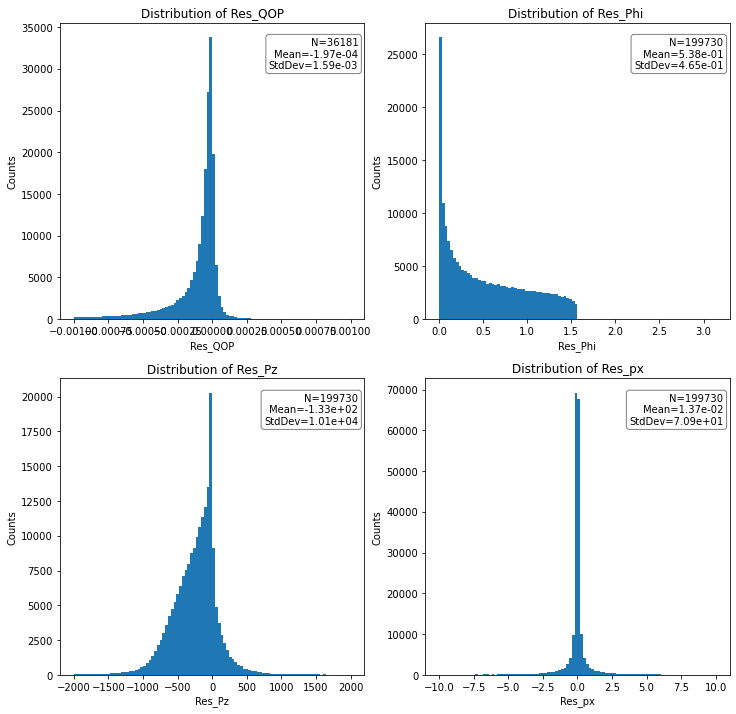

In [83]:
mean_QOP = np.mean(res_eQOP_fit_1d)
std_dev_QOP = np.std(res_eQOP_fit_1d)

mean_PHI = np.mean(resid_phi_1d)
std_dev_PHI = np.std(resid_phi_1d)

mean_Pz = np.mean(res_pz_fit_1d)
std_dev_Pz = np.std(res_pz_fit_1d)

mean_px = np.mean(res_px_fit_1d)
std_dev_px = np.std(res_px_fit_1d)

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
print("FASER2  in the Z axis with 0.2T Bx | 100 000 events simulated | With the patch  ")

n, bins, patches = axs[0,0].hist(res_eQOP_fit_1d, bins=100, range=(-0.001, 0.001))
axs[0,0].set_xlabel("Res_QOP")
axs[0,0].set_ylabel("Counts")
axs[0,0].set_title("Distribution of Res_QOP")

text_QOP = f"N={len(resid_phi_etaInf_1d)}\nMean={mean_QOP:.2e}\nStdDev={std_dev_QOP:.2e}"
props_QOP = dict(boxstyle='round', facecolor='white', alpha=0.5)
axs[0,0].text(0.98, 0.95, text_QOP, transform=axs[0,0].transAxes, ha='right', va='top', fontsize=10, bbox=props_QOP)

n, bins, patches = axs[0,1].hist(resid_phi_1d, bins=100, range=(0, 3.14))
axs[0,1].set_xlabel("Res_Phi")
axs[0,1].set_ylabel("Counts")
axs[0,1].set_title("Distribution of Res_Phi ")

text_PHI = f"N={len(resid_phi_1d)}\nMean={mean_PHI:.2e}\nStdDev={std_dev_PHI:.2e}"
props_PHI = dict(boxstyle='round', facecolor='white', alpha=0.5)
axs[0,1].text(0.98, 0.95, text_PHI, transform=axs[0,1].transAxes, ha='right', va='top', fontsize=10, bbox=props_PHI)

n, bins, patches = axs[1,0].hist(res_pz_fit_1d, bins=100, range=(-2000, 2000))
axs[1,0].set_xlabel("Res_Pz")
axs[1,0].set_ylabel("Counts")
axs[1,0].set_title("Distribution of Res_Pz")

text_Pz = f"N={len(res_pz_fit_1d)}\nMean={mean_Pz:.2e}\nStdDev={std_dev_Pz:.2e}"
props_Pz = dict(boxstyle='round', facecolor='white', alpha=0.5)
axs[1,0].text(0.98, 0.95, text_Pz, transform=axs[1,0].transAxes, ha='right', va='top', fontsize=10, bbox=props_Pz)

n, bins, patches = axs[1,1].hist(res_px_fit_1d, bins=100, range=(-10, 10))
axs[1,1].set_xlabel("Res_px")
axs[1,1].set_ylabel("Counts")
axs[1,1].set_title("Distribution of Res_px")

text_px = f"N={len(res_px_fit_1d)}\nMean={mean_px:.2e}\nStdDev={std_dev_px:.2e}"
props_px = dict(boxstyle='round', facecolor='white', alpha=0.5)
axs[1,1].text(0.98, 0.95, text_px, transform=axs[1,1].transAxes, ha='right', va='top', fontsize=10, bbox=props_px)

# show plot
plt.show()

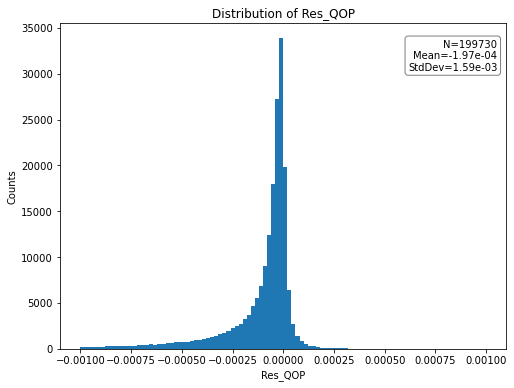

In [34]:
mean_QOP = np.mean(res_eQOP_fit_1d)
std_dev_QOP = np.std(res_eQOP_fit_1d)

# create histogram
fig, ax = plt.subplots(figsize=(8, 6))
n, bins, patches = ax.hist(res_eQOP_fit_1d, bins=100, range=(-0.001, 0.001))

# add text to plot
text = f"N={len(res_eQOP_fit_1d)}\nMean={mean_QOP:.2e}\nStdDev={std_dev_QOP:.2e}"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.98, 0.95, text, transform=ax.transAxes, ha='right', va='top', fontsize=10, bbox=props)

# add labels and title
plt.xlabel("Res_QOP")
plt.ylabel("Counts")
plt.title("Distribution of Res_QOP")

# show plot
plt.show()

FASER2 in the Z axis with 0.2T Bx | 100 000 events simulated | With the patch  


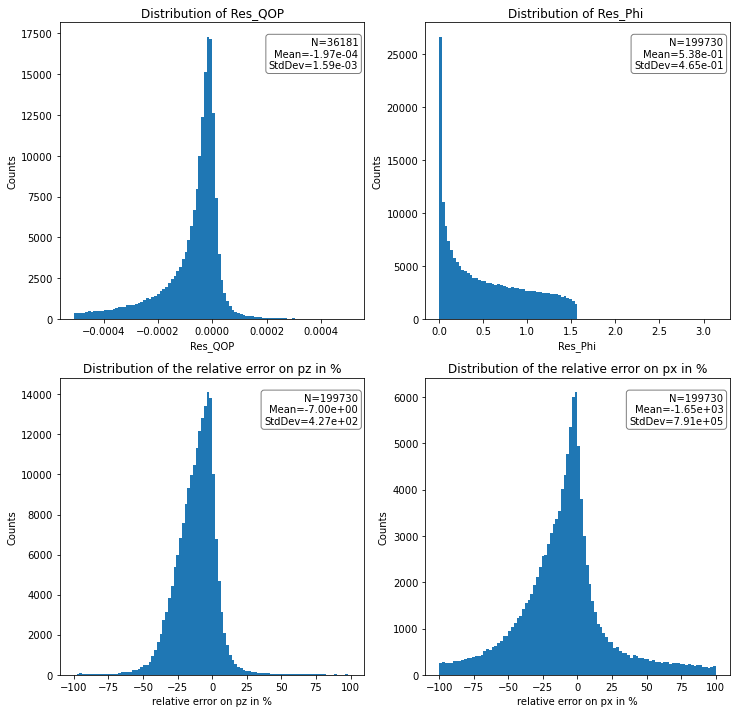

In [82]:
mean_QOP = np.mean(res_eQOP_fit_1d)
std_dev_QOP = np.std(res_eQOP_fit_1d)

mean_PHI = np.mean(resid_phi_1d)
std_dev_PHI = np.std(resid_phi_1d)

mean_Pz = np.mean(res_pz_fit_rel_1d)
std_dev_Pz = np.std(res_pz_fit_rel_1d)

mean_px = np.mean(res_px_fit_rel_1d)
std_dev_px = np.std(res_px_fit_rel_1d)

mean_py = np.mean(res_py_fit_rel_1d)
std_dev_py = np.std(res_py_fit_rel_1d)

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

print("FASER2 in the Z axis with 0.2T Bx | 100 000 events simulated | With the patch  ")
n, bins, patches = axs[0,0].hist(res_eQOP_fit_1d, bins=100, range=(-0.00051, 0.00051))
axs[0,0].set_xlabel("Res_QOP")
axs[0,0].set_ylabel("Counts")
axs[0,0].set_title("Distribution of Res_QOP")

text_QOP = f"N={len(resid_phi_etaInf_1d)}\nMean={mean_QOP:.2e}\nStdDev={std_dev_QOP:.2e}"
props_QOP = dict(boxstyle='round', facecolor='white', alpha=0.5)
axs[0,0].text(0.98, 0.95, text_QOP, transform=axs[0,0].transAxes, ha='right', va='top', fontsize=10, bbox=props_QOP)

n, bins, patches = axs[0,1].hist(resid_phi_1d, bins=100, range=(0, 3.14))
axs[0,1].set_xlabel("Res_Phi")
axs[0,1].set_ylabel("Counts")
axs[0,1].set_title("Distribution of Res_Phi ")

text_PHI = f"N={len(resid_phi_1d)}\nMean={mean_PHI:.2e}\nStdDev={std_dev_PHI:.2e}"
props_PHI = dict(boxstyle='round', facecolor='white', alpha=0.5)
axs[0,1].text(0.98, 0.95, text_PHI, transform=axs[0,1].transAxes, ha='right', va='top', fontsize=10, bbox=props_PHI)

n, bins, patches = axs[1,0].hist(res_pz_fit_rel_1d, bins=100, range=(-100, 100))
axs[1,0].set_xlabel("relative error on pz in %")
axs[1,0].set_ylabel("Counts")
axs[1,0].set_title("Distribution of the relative error on pz in %")

text_Pz = f"N={len(res_pz_fit_1d)}\nMean={mean_Pz:.2e}\nStdDev={std_dev_Pz:.2e}"
props_Pz = dict(boxstyle='round', facecolor='white', alpha=0.5)
axs[1,0].text(0.98, 0.95, text_Pz, transform=axs[1,0].transAxes, ha='right', va='top', fontsize=10, bbox=props_Pz)

n, bins, patches = axs[1,1].hist(res_px_fit_rel_1d, bins=100, range=(-100, 100))
axs[1,1].set_xlabel("relative error on px in %")
axs[1,1].set_ylabel("Counts")
axs[1,1].set_title("Distribution of the relative error on px in %")

text_px = f"N={len(res_px_fit_1d)}\nMean={mean_px:.2e}\nStdDev={std_dev_px:.2e}"
props_px = dict(boxstyle='round', facecolor='white', alpha=0.5)
axs[1,1].text(0.98, 0.95, text_px, transform=axs[1,1].transAxes, ha='right', va='top', fontsize=10, bbox=props_px)
# n, bins, patches = axs[1,1].hist(res_py_fit_1d, bins=100, range=(-50, 50))
# axs[1,1].set_xlabel("Res_py")
# axs[1,1].set_ylabel("Counts")
# axs[1,1].set_title("Distribution of Res_py")

# text_py = f"N={len(res_py_fit_1d)}\nMean={mean_py:.2e}\nStdDev={std_dev_py:.2e}"
# props_py = dict(boxstyle='round', facecolor='white', alpha=0.5)
# axs[1,1].text(0.98, 0.95, text_py, transform=axs[1,1].transAxes, ha='right', va='top', fontsize=10, bbox=props_py)

# show plot
plt.show()

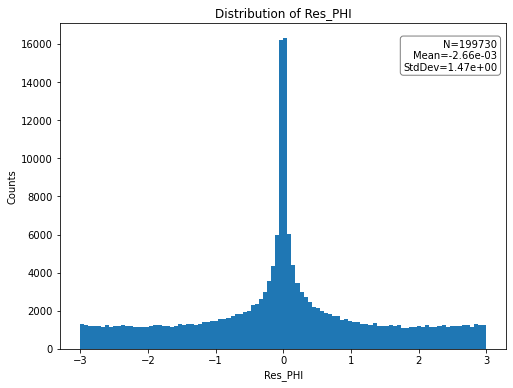

In [20]:
mean_PHI = np.mean(res_ePHI_fit_1d)
std_dev_PHI = np.std(res_ePHI_fit_1d)

# create histogram
fig, ax = plt.subplots(figsize=(8, 6))
n, bins, patches = ax.hist(res_ePHI_fit_1d, bins=100, range=(-3, 3))

# add text to plot
text = f"N={len(res_ePHI_fit_1d)}\nMean={mean_PHI:.2e}\nStdDev={std_dev_PHI:.2e}"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.98, 0.95, text, transform=ax.transAxes, ha='right', va='top', fontsize=10, bbox=props)

# add labels and title
plt.xlabel("Res_PHI")
plt.ylabel("Counts")
plt.title("Distribution of Res_PHI")

# show plot
plt.show()

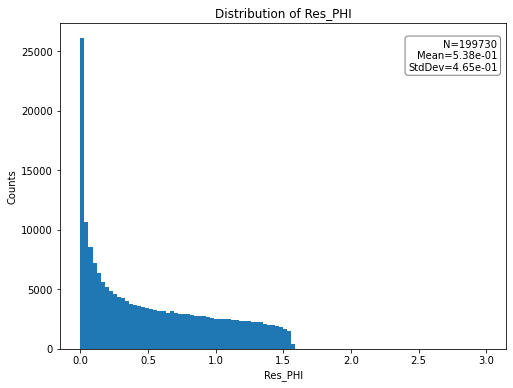

In [21]:
mean_PHI = np.mean(resid_phi_1d)
std_dev_PHI = np.std(resid_phi_1d)

# create histogram
fig, ax = plt.subplots(figsize=(8, 6))
n, bins, patches = ax.hist(resid_phi_1d, bins=100, range=(0, 3))

# add text to plot
text = f"N={len(resid_phi_1d)}\nMean={mean_PHI:.2e}\nStdDev={std_dev_PHI:.2e}"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.98, 0.95, text, transform=ax.transAxes, ha='right', va='top', fontsize=10, bbox=props)

# add labels and title
plt.xlabel("Res_PHI")
plt.ylabel("Counts")
plt.title("Distribution of Res_PHI")

# show plot
plt.show()

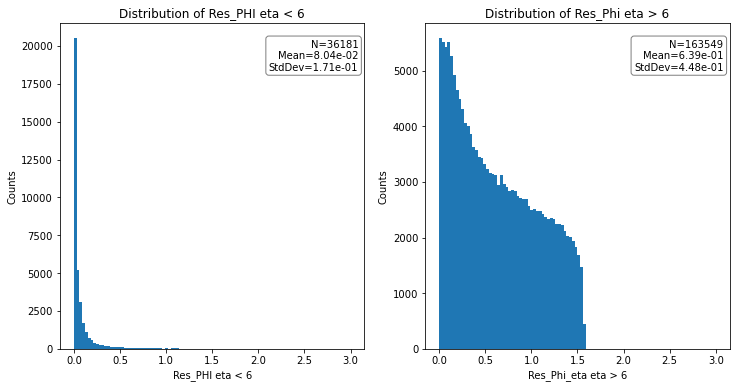

In [22]:
mean_PHI_Inf = np.mean(resid_phi_etaInf_1d)
std_dev_PHI_Inf = np.std(resid_phi_etaInf_1d)

mean_PHI_Sup = np.mean(resid_phi_etaSup_1d)
std_dev_PHI_Sup = np.std(resid_phi_etaSup_1d)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

n, bins, patches = axs[0].hist(resid_phi_etaInf_1d, bins=100, range=(0, 3))
axs[0].set_xlabel("Res_PHI eta < 6")
axs[0].set_ylabel("Counts")
axs[0].set_title("Distribution of Res_PHI eta < 6")

text_PHI_Inf = f"N={len(resid_phi_etaInf_1d)}\nMean={mean_PHI_Inf:.2e}\nStdDev={std_dev_PHI_Inf:.2e}"
props_PHI_Inf = dict(boxstyle='round', facecolor='white', alpha=0.5)
axs[0].text(0.98, 0.95, text_PHI_Inf, transform=axs[0].transAxes, ha='right', va='top', fontsize=10, bbox=props_PHI_Inf)

n, bins, patches = axs[1].hist(resid_phi_etaSup_1d, bins=100, range=(0, 3))
axs[1].set_xlabel("Res_Phi_eta eta > 6")
axs[1].set_ylabel("Counts")
axs[1].set_title("Distribution of Res_Phi eta > 6")

text_PHI_Sup = f"N={len(resid_phi_etaSup_1d)}\nMean={mean_PHI_Sup:.2e}\nStdDev={std_dev_PHI_Sup:.2e}"
props_PHI_Sup = dict(boxstyle='round', facecolor='white', alpha=0.5)
axs[1].text(0.98, 0.95, text_PHI_Sup, transform=axs[1].transAxes, ha='right', va='top', fontsize=10, bbox=props_PHI_Sup)

# show plot
plt.show()

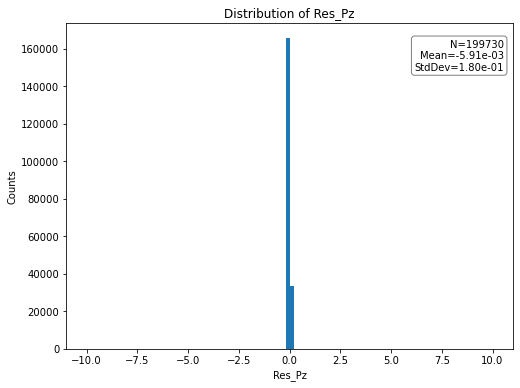

In [55]:
mean_Pz = np.mean(res_pz_fit_1d)
std_dev_Pz = np.std(res_pz_fit_1d)

# create histogram
fig, ax = plt.subplots(figsize=(8, 6))
n, bins, patches = ax.hist(res_pz_fit_1d, bins=100, range=(-10, 10))

# add text to plot
text = f"N={len(res_pz_fit_1d)}\nMean={mean_Pz:.2e}\nStdDev={std_dev_Pz:.2e}"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.98, 0.95, text, transform=ax.transAxes, ha='right', va='top', fontsize=10, bbox=props)

# add labels and title
plt.xlabel("Res_Pz")
plt.ylabel("Counts")
plt.title("Distribution of Res_Pz")

# show plot
plt.show()

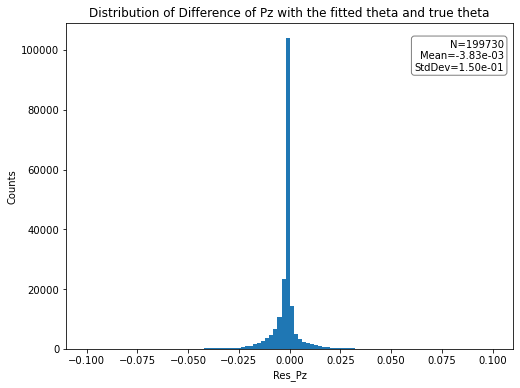

In [24]:
mean_Pz = np.mean(res_res_pz_1d)
std_dev_Pz = np.std(res_res_pz_1d)

# create histogram
fig, ax = plt.subplots(figsize=(8, 6))
n, bins, patches = ax.hist(res_res_pz_1d, bins=100, range=(-0.1, 0.1))

# add text to plot
text = f"N={len(res_res_pz_1d)}\nMean={mean_Pz:.2e}\nStdDev={std_dev_Pz:.2e}"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.98, 0.95, text, transform=ax.transAxes, ha='right', va='top', fontsize=10, bbox=props)

# add labels and title
plt.xlabel("Res_Pz")
plt.ylabel("Counts")
plt.title("Distribution of Difference of Pz with the fitted theta and true theta")

# show plot
plt.show()

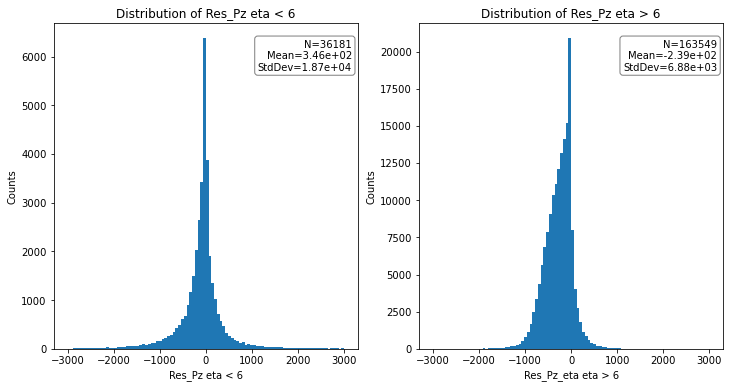

In [25]:
mean_Pz_Inf = np.mean(res_pz_fit_etaInf_1d)
std_dev_Pz_Inf = np.std(res_pz_fit_etaInf_1d)

mean_Pz_Sup = np.mean(res_pz_fit_etaSup_1d)
std_dev_Pz_Sup = np.std(res_pz_fit_etaSup_1d)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

n, bins, patches = axs[0].hist(res_pz_fit_etaInf_1d, bins=100, range=(-3000, 3000))
axs[0].set_xlabel("Res_Pz eta < 6")
axs[0].set_ylabel("Counts")
axs[0].set_title("Distribution of Res_Pz eta < 6")

text_Pz_Inf = f"N={len(res_pz_fit_etaInf_1d)}\nMean={mean_Pz_Inf:.2e}\nStdDev={std_dev_Pz_Inf:.2e}"
props_Pz_Inf = dict(boxstyle='round', facecolor='white', alpha=0.5)
axs[0].text(0.98, 0.95, text_Pz_Inf, transform=axs[0].transAxes, ha='right', va='top', fontsize=10, bbox=props_Pz_Inf)

n, bins, patches = axs[1].hist(res_pz_fit_etaSup_1d, bins=100, range=(-3000, 3000))
axs[1].set_xlabel("Res_Pz_eta eta > 6")
axs[1].set_ylabel("Counts")
axs[1].set_title("Distribution of Res_Pz eta > 6")

text_Pz_Sup = f"N={len(res_pz_fit_etaSup_1d)}\nMean={mean_Pz_Sup:.2e}\nStdDev={std_dev_Pz_Sup:.2e}"
props_Pz_Sup = dict(boxstyle='round', facecolor='white', alpha=0.5)
axs[1].text(0.98, 0.95, text_Pz_Sup, transform=axs[1].transAxes, ha='right', va='top', fontsize=10, bbox=props_Pz_Sup)

# show plot
plt.show()

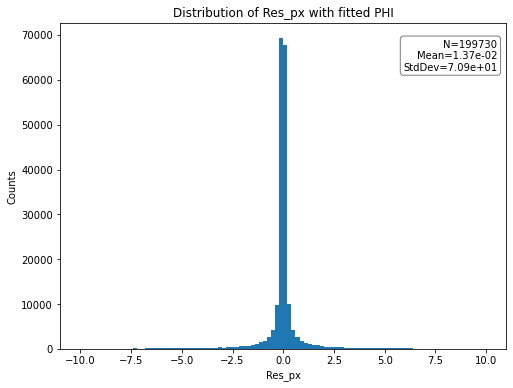

In [27]:
mean_px = np.mean(res_px_fit_1d)
std_dev_px = np.std(res_px_fit_1d)

# create histogram
fig, ax = plt.subplots(figsize=(8, 6))
n, bins, patches = ax.hist(res_px_fit_1d, bins=100, range=(-10, 10))

# add text to plot
text = f"N={len(res_px_fit_1d)}\nMean={mean_px:.2e}\nStdDev={std_dev_px:.2e}"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.98, 0.95, text, transform=ax.transAxes, ha='right', va='top', fontsize=10, bbox=props)

# add labels and title
plt.xlabel("Res_px")
plt.ylabel("Counts")
plt.title("Distribution of Res_px with fitted PHI")

# show plot
plt.show()

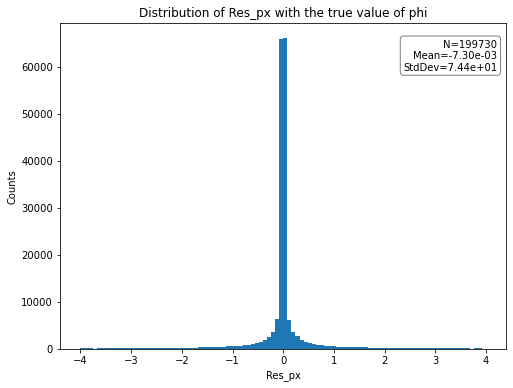

In [28]:
mean_px = np.mean(res_px_fit_tPhi_1d)
std_dev_px = np.std(res_px_fit_tPhi_1d)

# create histogram
fig, ax = plt.subplots(figsize=(8, 6))
n, bins, patches = ax.hist(res_px_fit_tPhi_1d, bins=100, range=(-4, 4))

# add text to plot
text = f"N={len(res_px_fit_tPhi_1d)}\nMean={mean_px:.2e}\nStdDev={std_dev_px:.2e}"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.98, 0.95, text, transform=ax.transAxes, ha='right', va='top', fontsize=10, bbox=props)

# add labels and title
plt.xlabel("Res_px")
plt.ylabel("Counts")
plt.title("Distribution of Res_px with the true value of phi")

# show plot
plt.show()

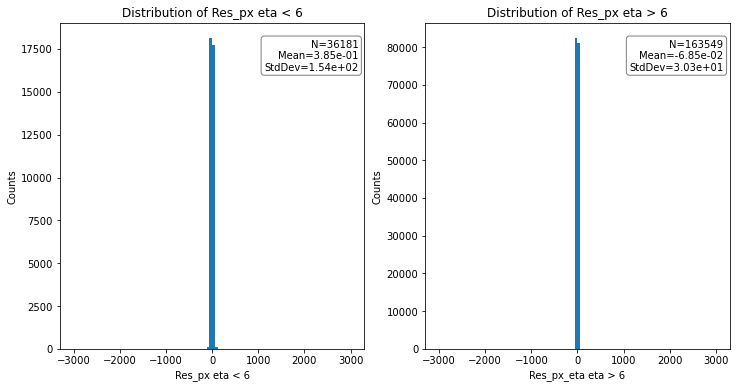

In [29]:
mean_px_Inf = np.mean(res_px_fit_etaInf_1d)
std_dev_px_Inf = np.std(res_px_fit_etaInf_1d)

mean_px_Sup = np.mean(res_px_fit_etaSup_1d)
std_dev_px_Sup = np.std(res_px_fit_etaSup_1d)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

n, bins, patches = axs[0].hist(res_px_fit_etaInf_1d, bins=100, range=(-3000, 3000))
axs[0].set_xlabel("Res_px eta < 6")
axs[0].set_ylabel("Counts")
axs[0].set_title("Distribution of Res_px eta < 6")

text_px_Inf = f"N={len(res_px_fit_etaInf_1d)}\nMean={mean_px_Inf:.2e}\nStdDev={std_dev_px_Inf:.2e}"
props_px_Inf = dict(boxstyle='round', facecolor='white', alpha=0.5)
axs[0].text(0.98, 0.95, text_px_Inf, transform=axs[0].transAxes, ha='right', va='top', fontsize=10, bbox=props_px_Inf)

n, bins, patches = axs[1].hist(res_px_fit_etaSup_1d, bins=100, range=(-3000, 3000))
axs[1].set_xlabel("Res_px_eta eta > 6")
axs[1].set_ylabel("Counts")
axs[1].set_title("Distribution of Res_px eta > 6")

text_px_Sup = f"N={len(res_px_fit_etaSup_1d)}\nMean={mean_px_Sup:.2e}\nStdDev={std_dev_px_Sup:.2e}"
props_px_Sup = dict(boxstyle='round', facecolor='white', alpha=0.5)
axs[1].text(0.98, 0.95, text_px_Sup, transform=axs[1].transAxes, ha='right', va='top', fontsize=10, bbox=props_px_Sup)

# show plot
plt.show()

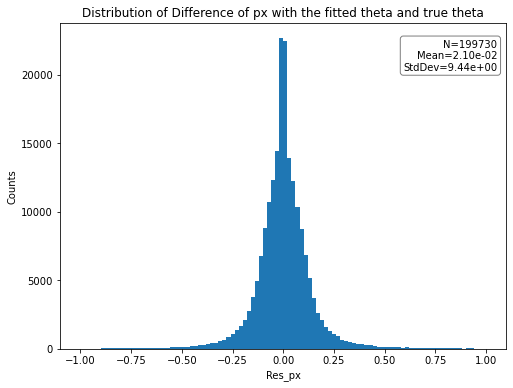

In [32]:
mean_px = np.mean(res_res_px_1d)
std_dev_px = np.std(res_res_px_1d)

# create histogram
fig, ax = plt.subplots(figsize=(8, 6))
n, bins, patches = ax.hist(res_res_px_1d, bins=100, range=(-1, 1))

# add text to plot
text = f"N={len(res_res_px_1d)}\nMean={mean_px:.2e}\nStdDev={std_dev_px:.2e}"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.98, 0.95, text, transform=ax.transAxes, ha='right', va='top', fontsize=10, bbox=props)

# add labels and title
plt.xlabel("Res_px")
plt.ylabel("Counts")
plt.title("Distribution of Difference of px with the fitted theta and true theta")

# show plot
plt.show()